# Graduate Admissions with Pytorch

This notebook uses the bike sharing dataset to perform regression using a neural network with Pytorch. The work is based on the tutorial by Janani Ravi.


Download the GRE data set
<b>Download link:</b> https://www.kaggle.com/mohansacharya/graduate-admissions



The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 ) - Graduate Record Exam Score
* TOEFL Scores ( out of 120 ) - Test of English as a Foreign Language
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) - SOP
* Undergraduate GPA ( out of 10 ) - Cumulative Grade Point Average
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

# 1.0 Import Libraries and Data

In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [3]:
data = pd.read_csv('C:/Users/imoge/Projects/Datasets/admission_predict.csv')                         

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(400, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
# Change name of target column and change name and choose columns
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 
             'University Rating', 'SOP', 
             'LOR ', 'CGPA', 'Research', 
             'Admit_Probability']]

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 2.0 Data Exploration

## GRE against TOEFL

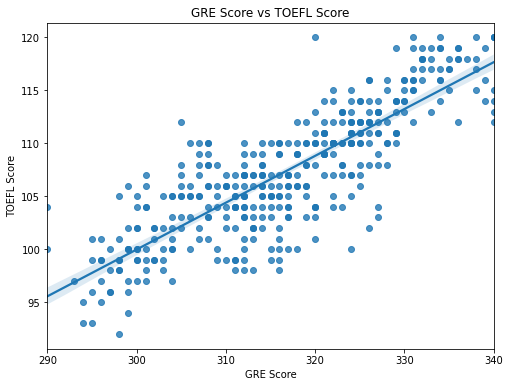

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.regplot( x ="GRE Score", y = "TOEFL Score", data = data)
plt.title("GRE Score vs TOEFL Score");

* Appears to be a linear relationship
* Students with high GRE scores usually have a high TOEFL score.

## GRE against CGPA

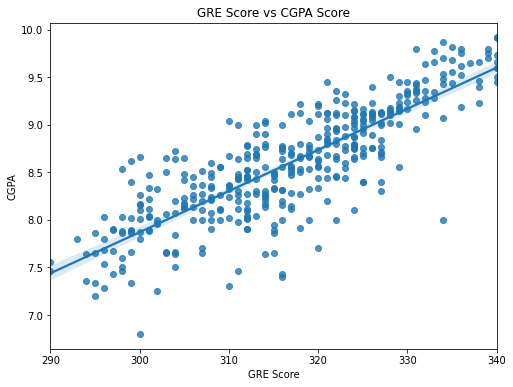

In [13]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.regplot( x ="GRE Score", y = "CGPA", data = data)
plt.title("GRE Score vs CGPA Score");

* Appears to be a linear relationship
* Students with High GRE scores also have high CGPA

## How CGPA Affects Chance of Admission

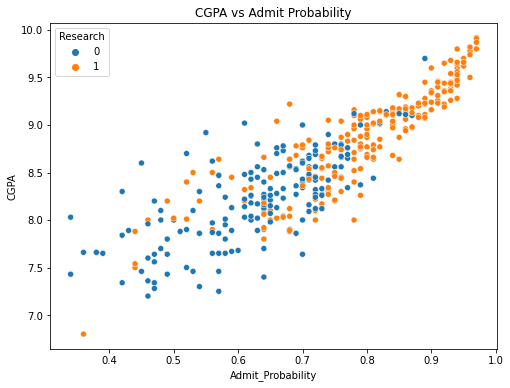

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.scatterplot(x = 'Admit_Probability', y = "CGPA", data = data, hue = 'Research')
plt.title("CGPA vs Admit Probability")
plt.xlabel('Admit_Probability')
plt.ylabel('CGPA');

* Students with higher CGPA more likely to be admitted
* Students that did research more likely to be admitted

## How TOEFL Affects Chance of Admission¶

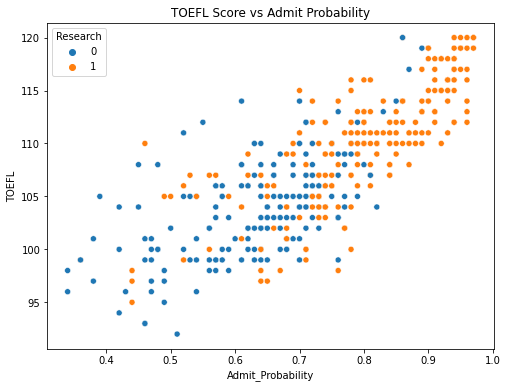

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.scatterplot(x = 'Admit_Probability', y = 'TOEFL Score', data = data, hue = 'Research')
plt.title("TOEFL Score vs Admit Probability")
plt.xlabel('Admit_Probability')
plt.ylabel('TOEFL');

* Relationship is not as strong as for the CGPA
* Even those students with research do not necessarily get admitted if their TOEFL score is low

## How GRE Affects Chance of Admission¶

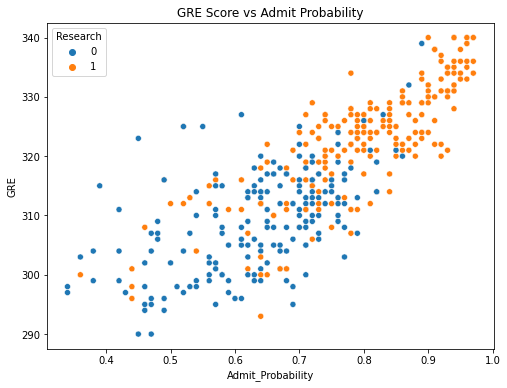

In [28]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.scatterplot(x = 'Admit_Probability', y = 'GRE Score', data = data, hue = 'Research')
plt.title("GRE Score vs Admit Probability")
plt.xlabel('Admit_Probability')
plt.ylabel('GRE');

* Again not as strong a relationship as CGPA

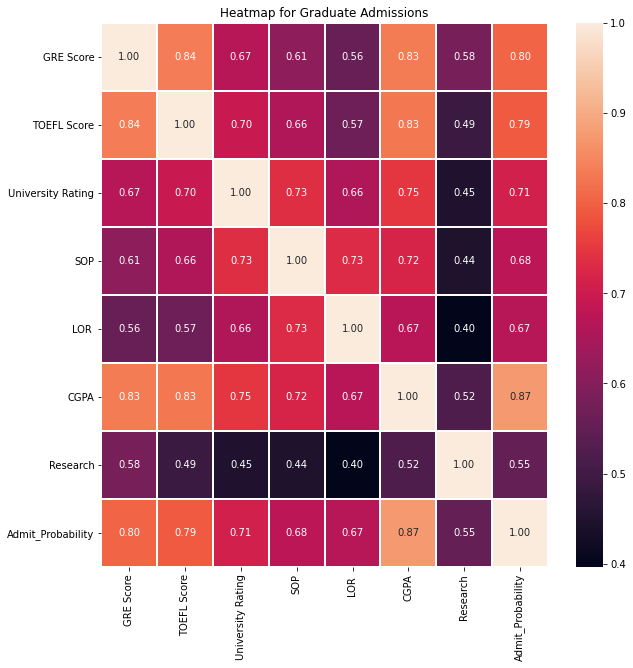

In [32]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')
plt.title("Heatmap for Graduate Admissions");

We have some multi-collinearity between some of the features. This can be a problem when we need to interpret the results, by looking at the coefficients. We would normally exclude one or more of these related features when performing linear regression. However, for machine learning, we are aiming to use the model for prediction so we do not need to necessarily remove these inter-related features.

https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a

# 3.0 Data Preparation

In [36]:
# Scale by extracting the mean and dividing by the standard deviation - standardises the data
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA' ]] = \
                preprocessing.scale(data[['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']])

In [37]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
72,0.365860,0.592221,5,1.591075,1.724515,1.429006,1,0.93
33,2.023903,1.087114,5,0.596653,0.610127,1.680865,1,0.90
288,-0.244998,-0.562528,4,1.591075,1.724515,0.707010,0,0.82
377,-2.339367,-1.222385,1,-1.889402,-1.618648,-1.744418,0,0.47
148,1.936637,1.417042,4,0.596653,0.052933,2.016677,1,0.96


In [38]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
count,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-3.785861e-16,5.412337e-16,3.087500,1.859624e-16,-3.019807e-16,8.076873e-16,0.547500,0.724350
std,1.001252e+00,1.001252e+00,1.143728,1.001252e+00,1.001252e+00,1.001252e+00,0.498362,0.142609
min,-2.339367e+00,-2.542098e+00,1.000000,-2.386613e+00,-2.733036e+00,-3.020504e+00,0.000000,0.340000
25%,-7.685900e-01,-7.274920e-01,2.000000,-8.949798e-01,-5.042604e-01,-7.201909e-01,0.000000,0.640000
50%,1.679859e-02,-6.763531e-02,3.000000,9.944220e-02,5.293342e-02,1.859559e-02,1.000000,0.730000
75%,7.149218e-01,7.571856e-01,4.000000,5.966532e-01,6.101273e-01,7.783704e-01,1.000000,0.830000
max,2.023903e+00,2.076899e+00,5.000000,1.591075e+00,1.724515e+00,2.218165e+00,1.000000,0.970000


In [39]:
# Choose independent features
col = ['GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]

In [40]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [41]:
# Target variable
target = data[['Admit_Probability']]

In [42]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


* Admit_Probability >= .80 is <b>2</b>
* .80 > Admit_Probability >= .60 is <b>1</b>
* Admit_Probability <.60 is <b>0</b>

In [43]:
# Create a copy of the target dataframe
y = target.copy()

In [84]:
# Bucket or bin the values according to the value thresholds above
y.loc[y['Admit_Probability'].between(0.8,1.0, 'both'), 'bin'] = 2
y.loc[y['Admit_Probability'].between(0.6,0.8, 'left'), 'bin'] = 1
y.loc[y['Admit_Probability'].between(0,0.6, 'left'), 'bin'] = 0

In [85]:
target = pd.DataFrame(y["bin"])
target.columns = ["Admit_Probability"]

In [86]:
target.head()

,Admit_Probability
0,2
1,1
2,1
3,2
4,1


In [87]:
# Get unique values of the target feature
target["Admit_Probability"].unique()

array([2, 1, 0], dtype=object)

In [94]:
# Training and test sets
X_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [95]:
# Convert to tensors
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()

In [96]:
print(Xtrain.shape, x_test.shape, y_train.shape,y_test.shape)

torch.Size([320, 5]) (80, 5) (320, 1) (80, 1)


In [113]:
Xtrain

tensor([[ 0.1913, -0.2326,  0.5967, -0.5043, -1.0056],
        [-0.1577, -0.3976, -1.3922, -1.0615, -0.1997],
        [-0.2450,  0.4273,  0.5967,  0.6101,  0.3376],
        ...,
        [ 0.4531,  0.4273,  0.0994, -1.0615,  0.1193],
        [ 1.2385,  1.4170,  1.5911,  1.7245,  1.3115],
        [-1.0304, -0.8925, -1.3922, -1.0615, -0.7034]])

In [102]:
# Check type
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 17 to 323
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Admit_Probability  320 non-null    object
dtypes: object(1)
memory usage: 13.1+ KB


In [107]:
y_train.Admit_Probability = y_train.Admit_Probability.astype("int")
y_test.Admit_Probability = y_test.Admit_Probability.astype("int")

In [108]:
Ytrain = torch.from_numpy(y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [109]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [110]:
# Check dimension (1d)
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

# 4.0 Define Network and Train

In this case we design a custom neural network rather than using the imported layers from Pytorch

* Note the input size will match the size of X = 5
* The output size is 3 since there are 3 labels or categories

In [114]:
input_size = Xtrain.shape[1] 
output_size = len(target['Admit_Probability'].unique())

Parameters :
* in_features – size of each input sample
* out_features – size of each output sample
* bias – If set to False, the layer will not learn an additive bias. Default: True
* dim(int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).

In [120]:
# Define the network
class Net(nn.Module):  # inherits from the nn.Module class
    
    def __init__(self,hidden_size, activation_fn = 'relu', apply_dropout=False): # input arguements
        super(Net, self).__init__()  # calls init method of the parent class
        
        self.fc1 = nn.Linear(input_size, hidden_size) # applying linear transformation
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None # dropout None unless specified. 
        if apply_dropout:
            self.dropout = nn.Dropout(0.2) # probability of 0.2 using samples from Bernoulli distribution
    def forward(self, x):
        
        activation_fn = None
        if  self.activation_fn == 'sigmoid':  # Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))
                activation_fn = F.torch.sigmoid

        elif self.activation_fn == 'tanh':  # Applies the element-wise function Tanh(x) = (e**x - e**-x)/(e**x + e**-x)
                activation_fn = F.torch.tanh

        elif self.activation_fn == 'relu': # Applies the rectified linear unit function element-wise ReLu(x)= max(0, x)
                 activation_fn = F.relu

        x = activation_fn(self.fc1(x))  # pass x through the first fully connected layer and apply the activation function
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)  # apply to the last linear layer

        x = self.fc3(x)
        return F.log_softmax(x, dim = -1)  # pass output of the last linear layer to softmax (probability score). Log more stable

* log_softmax : Softmax applies the Softmax() function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1
* While mathematically equivalent to log(softmax(x)), doing these two operations separately is slower, and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.

#  Set up Model Training Function

* 1000 epochs
* Optimizer = Adam
* Loss function Negative Log Likelihood Loss

In [121]:
# Function to train and evaluate

def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    loss_fn = nn.NLLLoss() # Difference between Y_train_tensor and Y_pred using NLLLoss() function 
    
    test_accuracy = 0.0
    for epoch in range(1, epochs):

        optimizer.zero_grad() # zero gradients for the weights the model will learn

        Ypred = model(Xtrain)

        loss = loss_fn(Ypred , Ytrain)
        loss.backward()  # back-propagation

        optimizer.step()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size  # Accuracy through element wise equality
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), test_accuracy))
            

    return {'model' : model,
            'epoch_data' : epoch_data, 
            'num_epochs' : epochs, 
            'optimizer' : optimizer, 
            'loss_fn' : loss_fn,
            'test_accuracy' : test_accuracy,
            '_, pred' : Ypred_test.data.max(1),
            'actual_test_label' : Ytest,
            }

# 6.0 Different Models

## 3 neurons and sigmoid activation

In [122]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [123]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.02 test loss - 0.97 Test accuracy - 0.5500
epoch - 200 (13%) train loss - 0.97 test loss - 0.93 Test accuracy - 0.5500
epoch - 300 (20%) train loss - 0.89 test loss - 0.87 Test accuracy - 0.7125
epoch - 400 (26%) train loss - 0.81 test loss - 0.80 Test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.75 test loss - 0.74 Test accuracy - 0.7375
epoch - 600 (40%) train loss - 0.70 test loss - 0.70 Test accuracy - 0.7375
epoch - 700 (46%) train loss - 0.67 test loss - 0.66 Test accuracy - 0.7500
epoch - 800 (53%) train loss - 0.64 test loss - 0.64 Test accuracy - 0.7625
epoch - 900 (60%) train loss - 0.62 test loss - 0.62 Test accuracy - 0.7500
epoch - 1000 (66%) train loss - 0.61 test loss - 0.61 Test accuracy - 0.7500


In [124]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [125]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.04 test loss - 0.99 Test accuracy - 0.5500
epoch - 200 (13%) train loss - 1.01 test loss - 0.99 Test accuracy - 0.5500
epoch - 300 (20%) train loss - 1.01 test loss - 0.95 Test accuracy - 0.5625
epoch - 400 (26%) train loss - 0.97 test loss - 0.93 Test accuracy - 0.5875
epoch - 500 (33%) train loss - 0.93 test loss - 0.90 Test accuracy - 0.5625
epoch - 600 (40%) train loss - 0.89 test loss - 0.85 Test accuracy - 0.6875
epoch - 700 (46%) train loss - 0.84 test loss - 0.82 Test accuracy - 0.6750
epoch - 800 (53%) train loss - 0.80 test loss - 0.78 Test accuracy - 0.6875
epoch - 900 (60%) train loss - 0.78 test loss - 0.76 Test accuracy - 0.7125
epoch - 1000 (66%) train loss - 0.74 test loss - 0.69 Test accuracy - 0.7375


In [126]:
net = Net(hidden_size=50, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

## 50 neurons and tanh activation

In [127]:
result_50_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.45 test loss - 0.45 Test accuracy - 0.8250
epoch - 200 (13%) train loss - 0.43 test loss - 0.42 Test accuracy - 0.8625
epoch - 300 (20%) train loss - 0.41 test loss - 0.42 Test accuracy - 0.8500
epoch - 400 (26%) train loss - 0.39 test loss - 0.43 Test accuracy - 0.8500
epoch - 500 (33%) train loss - 0.36 test loss - 0.46 Test accuracy - 0.8250
epoch - 600 (40%) train loss - 0.33 test loss - 0.51 Test accuracy - 0.8375
epoch - 700 (46%) train loss - 0.28 test loss - 0.58 Test accuracy - 0.8125
epoch - 800 (53%) train loss - 0.25 test loss - 0.63 Test accuracy - 0.8000
epoch - 900 (60%) train loss - 0.21 test loss - 0.68 Test accuracy - 0.7875
epoch - 1000 (66%) train loss - 0.17 test loss - 0.75 Test accuracy - 0.7875


## 1000 neurons and tanh activation

In [128]:
net = Net(hidden_size=1000, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [129]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.31 test loss - 0.50 Test accuracy - 0.8250
epoch - 200 (13%) train loss - 0.11 test loss - 0.77 Test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.03 test loss - 0.95 Test accuracy - 0.7500
epoch - 400 (26%) train loss - 0.01 test loss - 1.02 Test accuracy - 0.7750
epoch - 500 (33%) train loss - 0.01 test loss - 1.08 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.00 test loss - 1.13 Test accuracy - 0.7750
epoch - 700 (46%) train loss - 0.00 test loss - 1.17 Test accuracy - 0.7750
epoch - 800 (53%) train loss - 0.00 test loss - 1.21 Test accuracy - 0.7875
epoch - 900 (60%) train loss - 0.00 test loss - 1.23 Test accuracy - 0.7875
epoch - 1000 (66%) train loss - 0.00 test loss - 1.26 Test accuracy - 0.7875


In [130]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [131]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.33 test loss - 0.51 Test accuracy - 0.8125
epoch - 200 (13%) train loss - 0.15 test loss - 0.69 Test accuracy - 0.8000
epoch - 300 (20%) train loss - 0.07 test loss - 0.84 Test accuracy - 0.7750
epoch - 400 (26%) train loss - 0.03 test loss - 0.99 Test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.02 test loss - 1.06 Test accuracy - 0.7500
epoch - 600 (40%) train loss - 0.01 test loss - 1.08 Test accuracy - 0.7750
epoch - 700 (46%) train loss - 0.01 test loss - 1.06 Test accuracy - 0.7750
epoch - 800 (53%) train loss - 0.01 test loss - 1.15 Test accuracy - 0.7625
epoch - 900 (60%) train loss - 0.01 test loss - 1.22 Test accuracy - 0.7875
epoch - 1000 (66%) train loss - 0.00 test loss - 1.33 Test accuracy - 0.7625


## 100 neurons and sigmoid activation

In [133]:
net = Net(hidden_size=100, activation_fn='sigmoid')

net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [134]:
result_100_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.48 test loss - 0.50 Test accuracy - 0.8125
epoch - 200 (13%) train loss - 0.44 test loss - 0.45 Test accuracy - 0.8375
epoch - 300 (20%) train loss - 0.43 test loss - 0.43 Test accuracy - 0.8500
epoch - 400 (26%) train loss - 0.42 test loss - 0.43 Test accuracy - 0.8625
epoch - 500 (33%) train loss - 0.42 test loss - 0.43 Test accuracy - 0.8500
epoch - 600 (40%) train loss - 0.41 test loss - 0.44 Test accuracy - 0.8500
epoch - 700 (46%) train loss - 0.40 test loss - 0.45 Test accuracy - 0.8500
epoch - 800 (53%) train loss - 0.40 test loss - 0.45 Test accuracy - 0.8375
epoch - 900 (60%) train loss - 0.38 test loss - 0.46 Test accuracy - 0.8250
epoch - 1000 (66%) train loss - 0.37 test loss - 0.47 Test accuracy - 0.8250


## Final Model

In [135]:
result_model = result_100_sigmoid

Converting all our data in dataframes to plot it

In [136]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [137]:
import matplotlib.pyplot as plt

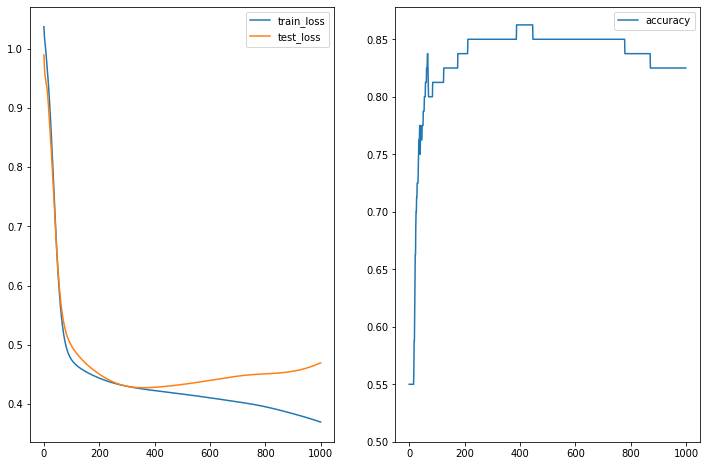

In [138]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

We plot a confusion matrix for the result

In [140]:
_, pred = result_model['_, pred'] 

In [141]:
y_pred = pred.detach().numpy()

In [142]:
Ytest = result_model['actual_test_label'].detach().numpy()

In [143]:
results = confusion_matrix(Ytest, y_pred)

In [144]:
results

array([[ 6,  5,  1],
       [ 2, 40,  2],
       [ 0,  4, 20]], dtype=int64)

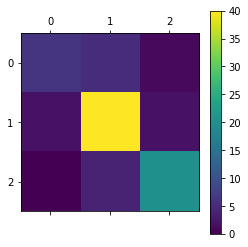

In [145]:
plt.matshow(results)

plt.colorbar()
plt.show()

* precision - how many of the predicted output were actually relevant
* recall - of those relevant datapoints, how many did the model predict

In [147]:
recall_score(Ytest, y_pred,average = 'weighted')

0.825

In [148]:
precision_score(Ytest, y_pred,average = 'weighted')

0.8223491570541259